<h1> Polynomial Regression </h1>

In [19]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("Version :", tf.__version__)

Num GPUs Available:  0
Version : 2.10.0


150 a : 3.8172174 b : -5.6319127 c : 7.079096 loss : tf.Tensor(61.33622, shape=(), dtype=float32)
300 a : 2.4194915 b : -3.9402368 c : 10.920751 loss : tf.Tensor(27.041882, shape=(), dtype=float32)
450 a : 0.9379872 b : -1.748558 c : 13.492325 loss : tf.Tensor(13.919682, shape=(), dtype=float32)
600 a : 0.078171715 b : -0.47392428 c : 14.9788065 loss : tf.Tensor(10.278909, shape=(), dtype=float32)
750 a : -0.33359578 b : 0.13630645 c : 15.69186 loss : tf.Tensor(9.559847, shape=(), dtype=float32)
900 a : -0.4981401 b : 0.3801452 c : 15.976877 loss : tf.Tensor(9.458662, shape=(), dtype=float32)
1050 a : -0.5529912 b : 0.46142825 c : 16.071892 loss : tf.Tensor(9.448568, shape=(), dtype=float32)
1200 a : -0.56818175 b : 0.48393905 c : 16.098207 loss : tf.Tensor(9.447862, shape=(), dtype=float32)
1350 a : -0.57165456 b : 0.48908463 c : 16.104223 loss : tf.Tensor(9.447827, shape=(), dtype=float32)
1500 a : -0.5723011 b : 0.49004176 c : 16.105341 loss : tf.Tensor(9.447826, shape=(), dtype=flo

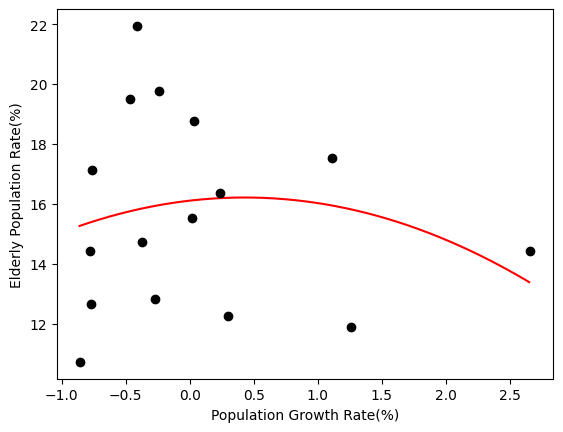

In [25]:
# 비선형회귀 : 변수들간의 관계가 선형이 아닌 비선형으로 구성된 회귀
# 해당 코드에서는 h0_y(x) : ax^2 + bx + c 형태로 구현

import numpy as np
import matplotlib.pyplot as plt
import random

x = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37,
    -0.86, -0.41, -0.27, 0.02, -0.76, 2.66]
y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 
    14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a,b,c parameter initialize
a = tf.Variable(random.random)
b = tf.Variable(random.random)
c = tf.Variable(random.random)

# compute loss function using MSE
def compute_loss() :
    pred = a*x*x + b*x + c
    error = pred - y
    loss = tf.reduce_mean(error**2)
    return loss

# Optimizing 
optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)

for i in range(3000) : 
    optimizer.minimize(compute_loss, var_list=[a,b,c])
    
    if i % 150 == 149 :
        print(i+1, "a :",a.numpy(),"b :",b.numpy(), "c :",c.numpy(), "loss :", compute_loss())

# Visualization
line_x = np.arange(min(x), max(x), 0.01)
line_y = a*line_x**2 + b*line_x + c
plt.plot(line_x, line_y, "r-")
plt.plot(x,y, "ko")
plt.xlabel("Population Growth Rate(%)")
plt.ylabel("Elderly Population Rate(%)")
plt.show()